In [18]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"


In [19]:
rho = 0.9
data = scipy.stats.multivariate_normal.rvs(mean = None, cov = np.array([[1,rho],[rho,1]]), size = 300)

data = scipy.stats.norm.cdf(data)

data = data.T

In [34]:
xx_c, yy_c = np.meshgrid(np.linspace(0+1e-4,1-1e-4,500), np.linspace(0+0+1e-4,1-1e-4,500))

In [35]:
data.shape[1]**(-1/5) * data.var(axis = 1)**0.5

array([0.091878  , 0.08887636])

In [36]:
# def Kernel2D_GaussCopula(kern_centers, h = None):
#     if kern_centers.shape[0] != 2:
#         raise AttributeError("Error: kern_centers shoud be a 2xn array")
    
#     if not (h is None):
#         if (h.shape != (2,)):
#             raise AttributeError("Error: h should be a (2,) array")
   

#     kern_centers_u = scipy.stats.norm.ppf(kern_centers)

#     if h is None:
#         mu_hat = kern_centers_u.mean(axis = 1)
#         s2_hat = kern_centers_u.var(ddof = 1, axis = 1)
#         n = kern_centers_u.shape[1]
#         h_GC = s2_hat**0.5 * ( ( 2 * mu_hat**2 * s2_hat + 3 * (1 - s2_hat)**2 ) * n )**(-0.2)
#         h = h_GC

#         # h =  (3 * n**(-1/5) * kern_centers_u.var(axis = 1)**0.5 + 2 * h_GC) / 5
#         h = n**(-1/5) * kern_centers_u.var(axis = 1)**0.5

#     h = h[:,None]

#     # print(h.shape)

#     exp_fac = (1-h**2) / 2 / h**2 / (2 - h**2)
#     c = 1 / (h * (2 - h**2)**0.5)

#     # print(kern_centers_u.shape)

#     def kern(x):
#         xinv = scipy.stats.norm.ppf(x)
        
#         emp = np.exp( - (1 - h**2) * xinv**2 * exp_fac)


#         temp = 2 * kern_centers_u[:,:,None] @ xinv[:,None,:]
#         temp = ( 1 - h[:,None,:]**2 ) * kern_centers_u[:,:,None]**2 - temp
        

#         s = np.exp( - exp_fac[:,:,None] * ( ( 1 - h[:,None,:]**2 ) * kern_centers_u[:,:,None]**2 - 2 * kern_centers_u[:,:,None] @ xinv[:,None,:] )) 

#         res = s * emp[:,None,:] * c[:,:,None]

#         return np.prod(res, axis = 0).mean(axis = 0)
    
#     return kern

In [37]:
kern = Kernel2D_GaussCopula(data)

In [38]:
print("computing gaussian kernel")
z = kern(np.vstack([xx_c.flatten(),yy_c.flatten()]))
z_nn = np.reshape(z, xx_c.shape)


gaus_copula = gen_gaus_c(rho)
# xx_c, yy_c = np.meshgrid(np.linspace(0+6e-4,1-6e-4,1500), np.linspace(0+0+6e-4,1-6e-4,1500))
print("computing theoretical gaussian copula")
z_c = gaus_copula(xx_c,yy_c)

levels_u = np.min([z_nn.max(), z_c.max(), 24])
levels_u = ((levels_u // 2) // 1 + 1 ) * 2
levels = np.linspace(0, levels_u, 21 )

computing gaussian kernel
computing theoretical gaussian copula


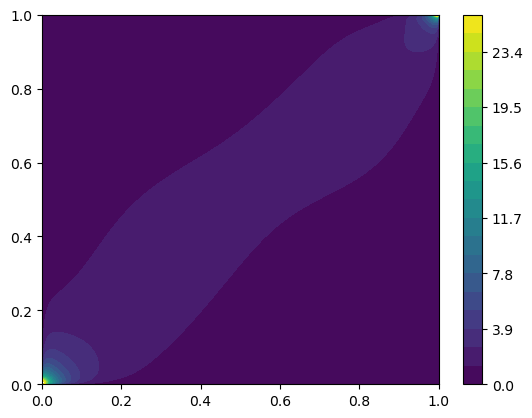

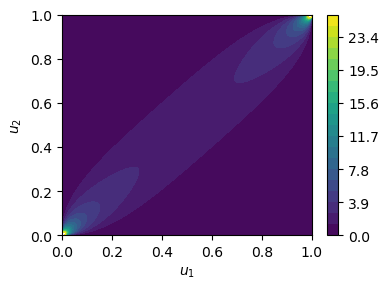

In [39]:
plt.contourf(xx_c, yy_c, z_nn, levels=levels)
plt.colorbar()
plt.xlim([0,1])
plt.ylim([0,1]);



fig, ax = plt.subplots(1,1, figsize = (4,3))
a = ax.contourf(xx_c, yy_c, z_c, levels=levels)
plt.colorbar(a)
plt.xlim([0,1])
plt.ylim([0,1]);
ax.set_xlabel(r"$u_1$")
ax.set_ylabel(r"$u_2$")
fig.tight_layout()

In [ ]:
Hxy = - (z_nn  * np.log(z_nn)).mean()
Hx = (z_nn.mean(axis = 0) * np.log(z_nn.mean(axis = 0))).mean()
Hy = (z_nn.mean(axis = 1) * np.log(z_nn.mean(axis = 1))).mean()

print(f"{Hx} + {Hy} - {Hxy} = {Hx + Hy - Hxy}")

# 0.02985301897471753
# 0.04713341320621767

print(f"theoretical MI : {-0.5 * np.log( 1 - rho**2)}")


0.004729434445558539 + 0.0014762143633649707 - -0.3719357316851541 = 0.3781413804940776
theoretical MI : 0.8303656034108255


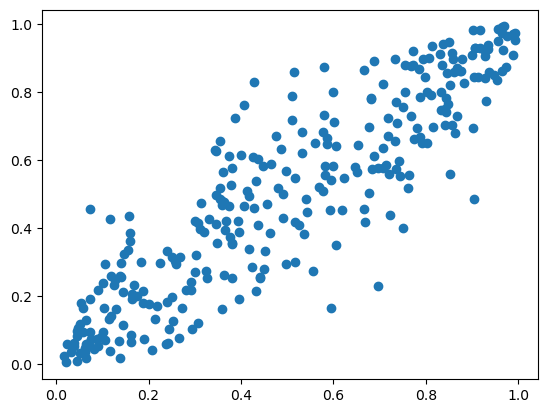

In [17]:
plt.scatter(data[0,:], data[1,:])

In [210]:
z.mean()

0.9969180341186921

In [8]:
X = data[:,0]
Y = data[:,1]


X = scipy.stats.ecdf(X).cdf.evaluate(X)
Y = scipy.stats.ecdf(Y).cdf.evaluate(Y)


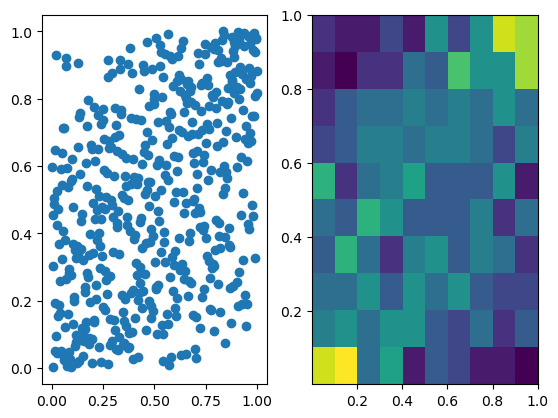

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(X,Y)

ax[1].hist2d(X,Y);

In [10]:
h = 100**(-1/5) * np.vstack([X,Y]).var(axis = 1)**0.5
h

array([0.11492341, 0.11492341])

In [11]:
kern_nn = KernelJones2D_nonnegative(np.vstack([X,Y]))

Computing normalization constants


In [12]:
xx, yy = np.meshgrid(np.linspace(0,1,500), np.linspace(0,1,500))

In [63]:
def gen_gaus_c(rho):
    # x,y in [0,1]
    c = 1 / (1 - rho**2)
    def kern(x,y):
        xinv = scipy.stats.norm.ppf(x)
        yinv = scipy.stats.norm.ppf(y)

        # print(np.abs(xinv).max(), np.abs(yinv).max())
        
        p = -1 / 2 / (1 - rho**2) * (rho**2 * (xinv**2 + yinv**2) - 2 * rho * xinv * yinv)
        return c * np.exp(p)

    return kern

In [64]:
levels = np.array([0.0, 0.2, 0.6, 1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ,
       5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8])

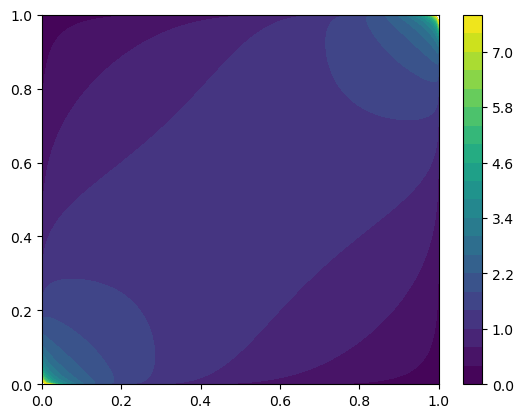

In [65]:
gaus_copula = gen_gaus_c(0.4)


xx_c, yy_c = np.meshgrid(np.linspace(0+1e-4,1-1e-4,500), np.linspace(0+0+1e-4,1-1e-4,500))
plt.contourf(xx_c, yy_c, gaus_copula(xx_c,yy_c), levels=levels)
plt.colorbar()
plt.xlim([0,1])
plt.ylim([0,1]);

In [13]:
res_nn = kern_nn(np.array([xx.flatten(), yy.flatten()]))

In [14]:
res_nn.mean()

1.0004972160415349

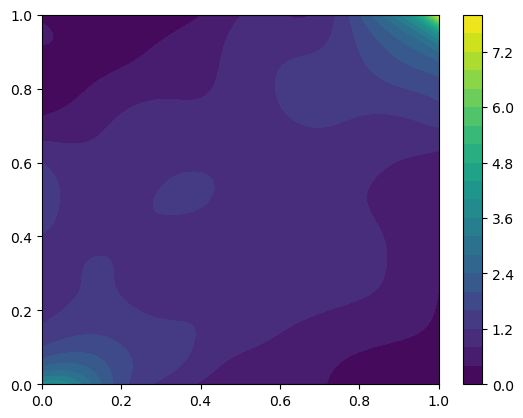

In [46]:
z_nn = res_nn.copy()
z_nn = np.reshape(z_nn, (500,500))
plt.contourf(xx, yy, z_nn, levels=20)
cbar = plt.colorbar()

# Compare to theoretical distribution

In [53]:
cbar.values

array([0.2, 0.6, 1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ,
       5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8])

In [70]:
Hxy = - (z_nn  * np.log(z_nn)).mean()
Hx = (z_nn.mean(axis = 0) * np.log(z_nn.mean(axis = 0))).mean()
Hy = (z_nn.mean(axis = 1) * np.log(z_nn.mean(axis = 1))).mean()

print(f"{Hx} + {Hy} - {Hxy} = {Hx + Hy - Hxy}")

# 0.02985301897471753
# 0.04713341320621767

print(f"theoretical MI : {-0.4 * np.log( 1 - rho**2)}")


0.0010348566615798367 + 0.0010998343964768358 - -0.11117951221842164 = 0.11331420327647831
theoretical MI : 0.06974135485791112


# Not non-negative

In [70]:
kern = KernelJones2D(np.vstack([X,Y]))

In [71]:
res = kern(np.array([xx.flatten(), yy.flatten()]))

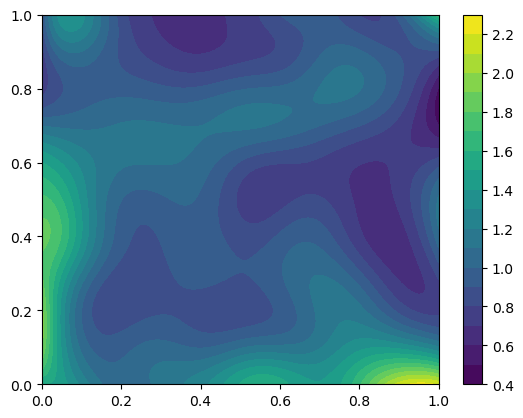

In [72]:
z = res.copy()
z = np.reshape(z, (500,500))
plt.contourf(xx, yy, z, levels = 20)
plt.colorbar()

In [25]:
z.max(), z.min()

(2.235263472388769, 0.4385163743783911)

In [13]:
z.sum() * 1/1000**2

1.0005865319510334

# kernel 1D

In [26]:
kern = KernelJones1D(X)

(1.0, 2.2529880510361338e-09)

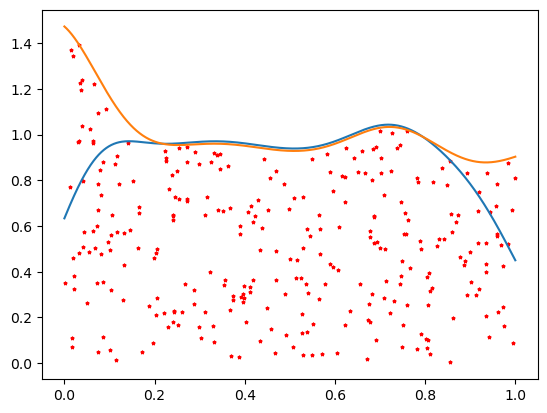

In [56]:
xx = np.linspace(0,1,10000)

dx = xx[1] - xx[0]

n = X.__len__()

h = n**(-1/5) * X.var()**0.5
# h = 0.05434782608695652

kde = gaussian_kde(X, h / X.var()**0.5)

plt.plot(xx,kde(xx))
plt.plot(xx,kern(xx))
plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)

scipy.integrate.quad(lambda x : kern(x), 0, 1)

(array([1.40521586, 1.35502958, 0.50186281, 1.20447074, 0.90335305,
        1.0539119 , 0.85316677, 0.95353933, 0.95353933, 0.65242165,
        1.40521586, 1.0539119 , 1.00372562, 0.70260793, 1.0539119 ]),
 array([0.0022421 , 0.06866131, 0.13508053, 0.20149974, 0.26791896,
        0.33433817, 0.40075739, 0.4671766 , 0.53359581, 0.60001503,
        0.66643424, 0.73285346, 0.79927267, 0.86569189, 0.9321111 ,
        0.99853031]),
 <BarContainer object of 15 artists>)

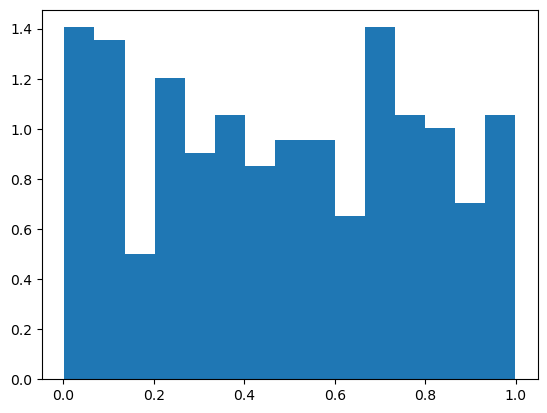

In [32]:
plt.hist(X, 15, density = True)

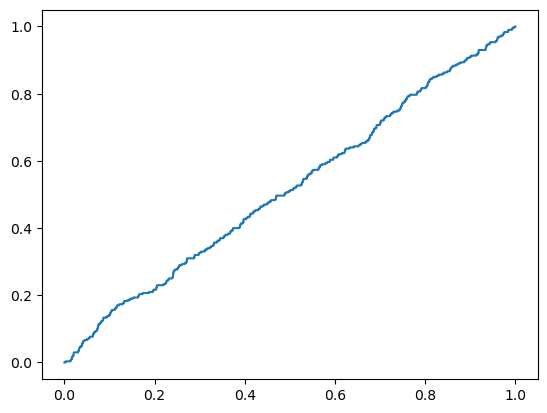

In [33]:
plt.plot(xx,scipy.stats.ecdf(X).cdf.evaluate(xx))

In [55]:
kern(xx).mean()

1.0000018770836023

In [66]:
temp = kern(xx)
(temp[1:] + temp[:-1]).mean() / 2

1.0000000019863542

In [61]:
c = scipy.integrate.quad(kde, 0,1)

kde_n = lambda x : kde(x) / c[0]
scipy.integrate.quad(kde_n, 0,1)

(0.9999999999999998, 2.331384584518259e-09)

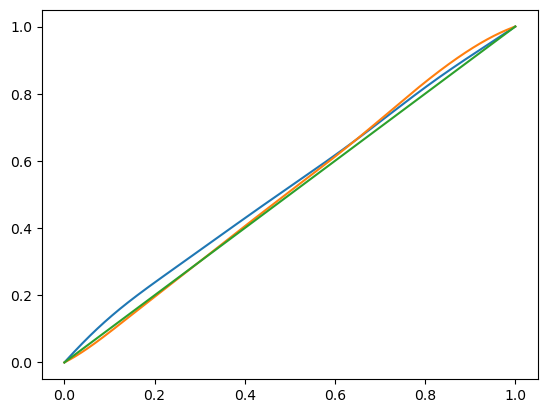

In [62]:
plt.plot(xx, kern(xx).cumsum() * dx)
plt.plot(xx, kde_n(xx).cumsum() * dx)
plt.plot(xx,xx)

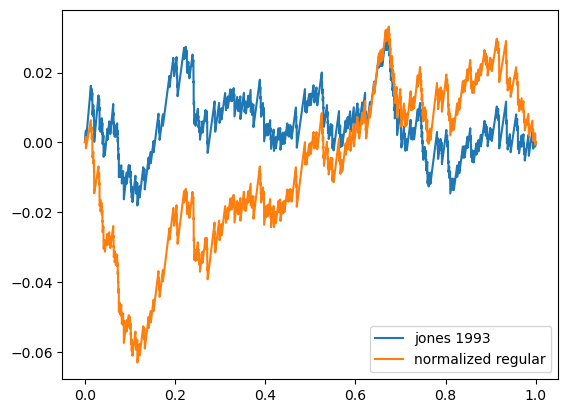

In [65]:
plt.plot(xx, kern(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "jones 1993")
plt.plot(xx, kde_n(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "normalized regular")
plt.legend()